# Capstone 2 - Baseball Stat Projections

In [23]:
#Import relevant libraries

import os
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime


In [24]:
path = "/Users/joeboardman/Documents/Springboard/Capstone 2/Ideas/Baseball/"
save_path = "/Users/joeboardman/Documents/Springboard/Capstone 2/"
print(path)

/Users/joeboardman/Documents/Springboard/Capstone 2/Ideas/Baseball/


In [192]:
#create folder structure
data = os.path.join(save_path, 'data')
os.mkdir(data)

figures = os.path.join(save_path, 'figures')
os.mkdir(figures)

models = os.path.join(save_path, 'models')
os.mkdir(models)

FileExistsError: [Errno 17] File exists: '/Users/joeboardman/Documents/Springboard/Capstone 2/data'

In [25]:
#import csv files as dataframes with batting statistics and player information
os.chdir(path)
df = pd.read_csv('batting.csv')
df_player = pd.read_csv('player.csv')
df_salaries = pd.read_csv('salaries.csv')
df_position = pd.read_csv('appearances.csv')

In [26]:
#combine records where a player played for multiple teams into one record
df = df.groupby(['player_id', 'year'])['team_id', 'g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'g_idp'].sum().reset_index()
df

/Users/joeboardman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,player_id,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,aardsda01,2004,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2006,45,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,aardsda01,2007,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2008,47,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2009,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93893,zwilldu01,1910,27,87.0,7.0,16.0,5.0,0.0,0.0,5.0,1.0,0.0,11.0,0.0,0.0,1.0,1.0,0.0,0.0
93894,zwilldu01,1914,154,592.0,91.0,185.0,38.0,8.0,16.0,95.0,21.0,0.0,46.0,68.0,0.0,1.0,10.0,0.0,0.0
93895,zwilldu01,1915,150,548.0,65.0,157.0,32.0,7.0,13.0,94.0,24.0,0.0,67.0,65.0,0.0,2.0,18.0,0.0,0.0
93896,zwilldu01,1916,35,53.0,4.0,6.0,1.0,0.0,1.0,8.0,0.0,0.0,4.0,6.0,0.0,0.0,2.0,0.0,0.0


In [27]:
#manipulate df_position so that it gives primary position per player, per year
print(df_position.shape)
df_position = df_position.iloc[:,[0,3,8,9,10,11,12,13,14,15,16,17,18]]
df_position['g_dh'] = df_position['g_dh'].fillna(0)
print(df_position.shape)
print(df_position.info())
print(df_position.head())

(100951, 21)
(100951, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100951 entries, 0 to 100950
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100951 non-null  int64  
 1   player_id  100951 non-null  object 
 2   g_p        100951 non-null  int64  
 3   g_c        100951 non-null  int64  
 4   g_1b       100951 non-null  int64  
 5   g_2b       100951 non-null  int64  
 6   g_3b       100951 non-null  int64  
 7   g_ss       100951 non-null  int64  
 8   g_lf       100951 non-null  int64  
 9   g_cf       100951 non-null  int64  
 10  g_rf       100951 non-null  int64  
 11  g_of       100951 non-null  int64  
 12  g_dh       100951 non-null  float64
dtypes: float64(1), int64(11), object(1)
memory usage: 10.0+ MB
None
   year  player_id  g_p  g_c  g_1b  g_2b  g_3b  g_ss  g_lf  g_cf  g_rf  g_of  \
0  1871  barnero01    0    0     0    16     0    15     0     0     0     0   
1  1871  barrofr01 

In [28]:
#create column for # of games played as position player so we can delete pitchers
df_position['games_as_pos_player'] = df_position['g_c'] + df_position['g_1b'] + df_position['g_2b'] + df_position['g_3b'] + df_position['g_ss'] + df_position['g_lf'] + df_position['g_cf'] + df_position['g_rf'] + df_position['g_of'] + df_position['g_dh']
df_position = df_position.drop('g_p', axis=1)
df_position = df_position[df_position['games_as_pos_player'] > 0]
df_position

,year,player_id,g_c,g_1b,g_2b,g_3b,g_ss,g_lf,g_cf,g_rf,g_of,g_dh,games_as_pos_player
0,1871,barnero01,0,0,16,0,15,0,0,0,0,0.0,31.0
1,1871,barrofr01,0,0,1,0,0,13,0,4,17,0.0,35.0
2,1871,birdsda01,7,0,0,0,0,0,0,27,27,0.0,61.0
3,1871,conefr01,0,0,0,0,0,18,0,1,18,0.0,37.0
4,1871,gouldch01,0,30,0,0,0,0,0,1,1,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100942,2015,younger03,0,0,0,0,0,5,0,2,7,0.0,14.0
100945,2015,zimmery01,0,93,0,0,0,1,0,0,1,0.0,95.0
100947,2015,zobribe01,0,0,35,4,0,18,0,2,20,2.0,81.0
100948,2015,zobribe01,0,0,34,0,0,27,0,3,29,4.0,97.0


In [29]:
#merge dataframe to bring in player details, salaries, position etc.
df = pd.merge(df, df_player, on='player_id')
df = pd.merge(df, df_salaries, on=['player_id', 'year'])
df = pd.merge(df, df_position, on=['player_id', 'year'])
df = df[df['year'] > 1989]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12478 entries, 0 to 14509
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            12478 non-null  object 
 1   year                 12478 non-null  int64  
 2   g                    12478 non-null  int64  
 3   ab                   12478 non-null  float64
 4   r                    12478 non-null  float64
 5   h                    12478 non-null  float64
 6   double               12478 non-null  float64
 7   triple               12478 non-null  float64
 8   hr                   12478 non-null  float64
 9   rbi                  12478 non-null  float64
 10  sb                   12478 non-null  float64
 11  cs                   12478 non-null  float64
 12  bb                   12478 non-null  float64
 13  so                   12478 non-null  float64
 14  ibb                  12478 non-null  float64
 15  hbp                  12478 non-null 

In [30]:
#Delete unnecessary columns
df = df.drop(df.columns[[23,24,25,26,27,28,29,30,34,35,36,37,39,40,41,43]], axis=1)

In [31]:
#Create datetime column with birthday to be able to calculate age
df['birth_date'] = pd.to_datetime((df.birth_year*10000+df.birth_month*100+df.birth_day).apply(str),format='%Y%m%d')

In [32]:
#calculate OPS, years of service, same team
df['obp'] = (df['h'] + df['bb'] + df['hbp']) / (df['ab'] + df['bb'] + df['hbp'])
df['slg'] = ((df['h'] - (df['double'] + df['triple'] + df['hr'])) + (df['double'] * 2) + (df['triple'] * 3) + (df['hr'] * 4)) / df['ab']
df['ops'] = df['obp'] + df['slg']
print(df.head())

   player_id  year   g     ab     r     h  double  triple    hr   rbi  ...  \
0  abbotje01  1998  89  244.0  33.0  68.0    14.0     1.0  12.0  41.0  ...   
1  abbotje01  1999  17   57.0   5.0   9.0     0.0     0.0   2.0   6.0  ...   
2  abbotje01  2000  80  215.0  31.0  59.0    15.0     1.0   3.0  29.0  ...   
3  abbotje01  2001  28   42.0   5.0  11.0     3.0     0.0   0.0   5.0  ...   
4  abbotku01  1993  20   61.0  11.0  15.0     1.0     0.0   3.0   9.0  ...   

   g_lf  g_cf  g_rf  g_of  g_dh  games_as_pos_player  birth_date       obp  \
0    20    38    27    76   0.0                161.0  1972-08-17  0.304348   
1    17     0     0    17   0.0                 34.0  1972-08-17  0.225806   
2    20    33    16    65   2.0                136.0  1972-08-17  0.344538   
3     1     9     8    17   0.0                 35.0  1972-08-17  0.326087   
4    13     0     0    13   0.0                 34.0  1969-06-02  0.281250   

        slg       ops  
0  0.491803  0.796151  
1  0.263158  0

In [33]:
#calculate season number in a player's career and age
df['year_of_career'] = (df['year'] - pd.DatetimeIndex(df['debut']).year)
df['age'] = (df['year'] - pd.DatetimeIndex(df['birth_date']).year)
print(df.head())
print(df.info())

   player_id  year   g     ab     r     h  double  triple    hr   rbi  ...  \
0  abbotje01  1998  89  244.0  33.0  68.0    14.0     1.0  12.0  41.0  ...   
1  abbotje01  1999  17   57.0   5.0   9.0     0.0     0.0   2.0   6.0  ...   
2  abbotje01  2000  80  215.0  31.0  59.0    15.0     1.0   3.0  29.0  ...   
3  abbotje01  2001  28   42.0   5.0  11.0     3.0     0.0   0.0   5.0  ...   
4  abbotku01  1993  20   61.0  11.0  15.0     1.0     0.0   3.0   9.0  ...   

   g_rf  g_of  g_dh  games_as_pos_player  birth_date       obp       slg  \
0    27    76   0.0                161.0  1972-08-17  0.304348  0.491803   
1     0    17   0.0                 34.0  1972-08-17  0.225806  0.263158   
2    16    65   2.0                136.0  1972-08-17  0.344538  0.395349   
3     8    17   0.0                 35.0  1972-08-17  0.326087  0.333333   
4     0    13   0.0                 34.0  1969-06-02  0.281250  0.409836   

        ops  year_of_career  age  
0  0.796151               1   26  
1  0

In [34]:
#Fill NaN values in 'obp', 'slg', 'ops' columns with zeros because the errors are driven by a player 
#having 0 at bats for a season
dftest1 = df[df['obp'].isna()]
print(dftest1.head())
df['obp'] = df['obp'].fillna(0)
df['slg'] = df['slg'].fillna(0)
df['ops'] = df['ops'].fillna(0)
print(df.info())
print(df.head())

      player_id  year   g   ab    r    h  double  triple   hr  rbi  ...  g_rf  \
1314  bonesri01  1993  33  0.0  0.0  0.0     0.0     0.0  0.0  0.0  ...     1   
2150  carabra01  1993   6  0.0  0.0  0.0     0.0     0.0  0.0  0.0  ...     0   
2903  crometr01  1994   2  0.0  1.0  0.0     0.0     0.0  0.0  0.0  ...     0   
6810  johnsra05  1993  36  0.0  0.0  0.0     0.0     0.0  0.0  0.0  ...     0   
7984  lopezja02  2009  14  0.0  0.0  0.0     0.0     0.0  0.0  0.0  ...     1   

      g_of  g_dh  games_as_pos_player  birth_date  obp  slg  ops  \
1314     1   0.0                  2.0  1969-04-07  NaN  NaN  NaN   
2150     0   0.0                  5.0  1969-05-23  NaN  NaN  NaN   
2903     0   0.0                  2.0  1967-11-21  NaN  NaN  NaN   
6810     1   0.0                  2.0  1963-09-10  NaN  NaN  NaN   
7984     1   0.0                  2.0  1977-07-11  NaN  NaN  NaN   

      year_of_career  age  
1314               2   24  
2150               0   24  
2903               1

In [35]:
#check for duplicates
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,g_rf,g_of,g_dh,games_as_pos_player,birth_date,obp,slg,ops,year_of_career,age
9602,nixla01,2006,19,67.0,3.0,11.0,2.0,0.0,1.0,10.0,...,0,9,0.0,18.0,1980-10-30,0.188406,0.238806,0.427212,3,26


In [36]:
#Drop Duplicates
df.drop_duplicates(keep=False, inplace=True)

print(df)

       player_id  year    g     ab     r      h  double  triple    hr   rbi  \
0      abbotje01  1998   89  244.0  33.0   68.0    14.0     1.0  12.0  41.0   
1      abbotje01  1999   17   57.0   5.0    9.0     0.0     0.0   2.0   6.0   
2      abbotje01  2000   80  215.0  31.0   59.0    15.0     1.0   3.0  29.0   
3      abbotje01  2001   28   42.0   5.0   11.0     3.0     0.0   0.0   5.0   
4      abbotku01  1993   20   61.0  11.0   15.0     1.0     0.0   3.0   9.0   
...          ...   ...  ...    ...   ...    ...     ...     ...   ...   ...   
14505  zuninmi01  2014  131  438.0  51.0   87.0    20.0     2.0  22.0  60.0   
14506  zuninmi01  2015  112  350.0  28.0   61.0    11.0     0.0  11.0  28.0   
14507  zupcibo01  1991   18   25.0   3.0    4.0     0.0     0.0   1.0   3.0   
14508  zupcibo01  1992  124  392.0  46.0  108.0    19.0     1.0   3.0  43.0   
14509  zupcibo01  1993  141  286.0  40.0   69.0    24.0     2.0   2.0  26.0   

       ...  g_rf  g_of  g_dh  games_as_pos_player  

In [37]:
#count unique values for each column
for column in df.columns:
    vals = df[column].nunique()
    print(column, vals)

player_id 2142
year 26
g 163
ab 694
r 146
h 228
double 59
triple 22
hr 64
rbi 157
sb 73
cs 26
bb 147
so 202
ibb 42
hbp 32
sh 27
sf 18
g_idp 33
birth_year 47
birth_month 12
birth_day 31
birth_country 27
name_first 681
name_last 1553
name_given 1931
debut 1578
team_id 35
salary 1988
g_c 151
g_1b 163
g_2b 163
g_3b 163
g_ss 163
g_lf 163
g_cf 163
g_rf 163
g_of 163
g_dh 145
games_as_pos_player 343
birth_date 1961
obp 6609
slg 7366
ops 11109
year_of_career 26
age 31


In [38]:
print(df.birth_country.value_counts())

USA            9319
D.R.           1100
Venezuela       684
P.R.            639
CAN             136
Cuba            135
Mexico           95
Panama           83
Japan            77
Colombia         40
Curacao          36
Jamaica          24
Germany          18
Australia        17
V.I.             16
Nicaragua        14
South Korea      13
Netherlands       6
Aruba             5
Honduras          4
Belgium           4
Singapore         3
Brazil            2
Taiwan            2
Belize            2
France            1
Italy             1
Name: birth_country, dtype: int64


In [39]:
round(df.describe(),0)

,year,g,ab,r,h,double,triple,hr,rbi,sb,...,g_cf,g_rf,g_of,g_dh,games_as_pos_player,obp,slg,ops,year_of_career,age
count,12476.0,12476.0,12476.0,12476.0,12476.0,12476.0,12476.0,12476.0,12476.0,12476.0,...,12476.0,12476.0,12476.0,12476.0,12476.0,12476.0,12476.0,12476.0,12476.0,12476.0
mean,2002.0,99.0,318.0,44.0,85.0,17.0,2.0,10.0,42.0,6.0,...,10.0,10.0,30.0,4.0,116.0,0.0,0.0,1.0,6.0,30.0
std,7.0,44.0,186.0,31.0,55.0,12.0,2.0,10.0,31.0,9.0,...,30.0,29.0,48.0,16.0,81.0,0.0,0.0,0.0,4.0,4.0
min,1990.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0
25%,1996.0,66.0,156.0,17.0,37.0,7.0,0.0,2.0,16.0,0.0,...,0.0,0.0,0.0,0.0,51.0,0.0,0.0,1.0,3.0,27.0
50%,2002.0,105.0,315.0,39.0,80.0,15.0,1.0,6.0,36.0,2.0,...,0.0,0.0,0.0,0.0,105.0,0.0,0.0,1.0,5.0,29.0
75%,2008.0,137.0,484.0,67.0,131.0,25.0,3.0,14.0,62.0,8.0,...,0.0,3.0,47.0,1.0,154.0,0.0,0.0,1.0,9.0,32.0
max,2015.0,163.0,716.0,152.0,262.0,59.0,23.0,73.0,165.0,78.0,...,162.0,162.0,162.0,153.0,366.0,1.0,2.0,3.0,25.0,49.0


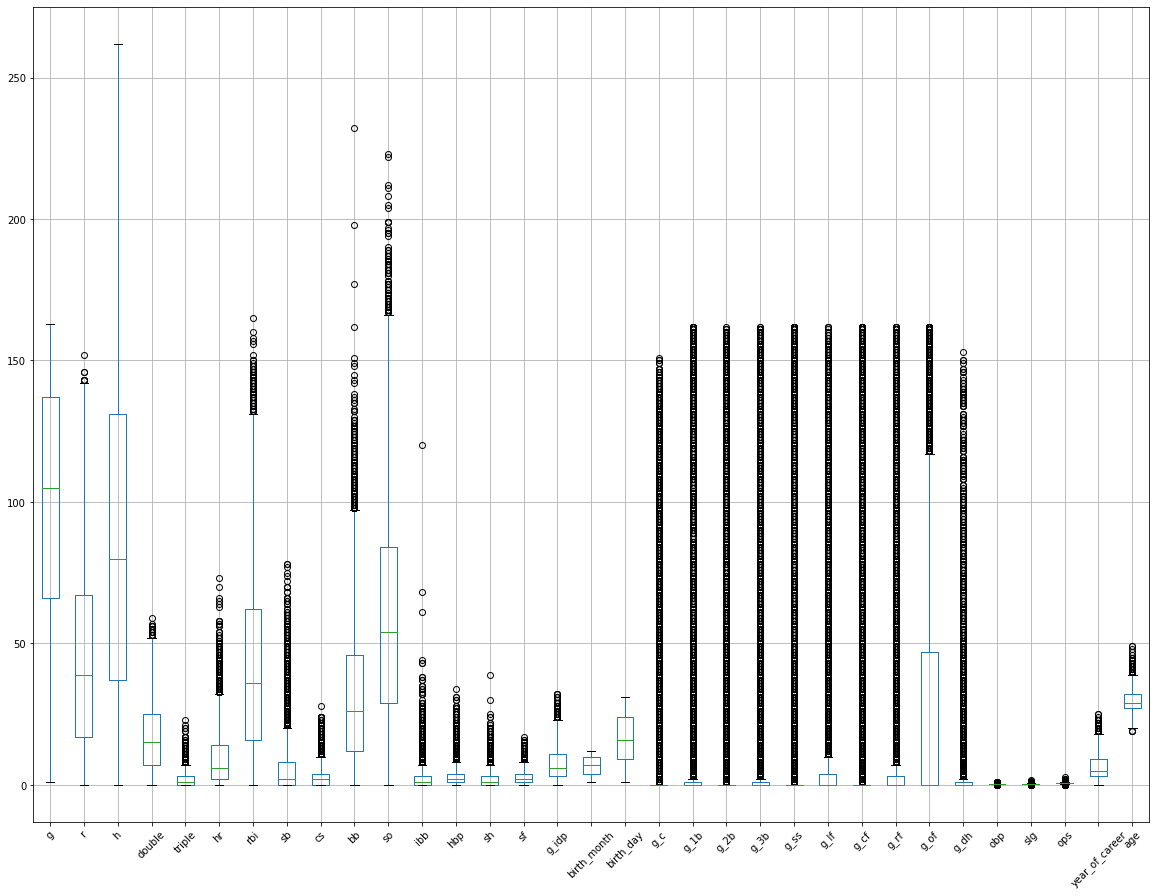

In [40]:
#Check for outliers
df_bp = df.drop(['salary', 'year', 'birth_year', 'games_as_pos_player', 'ab'], axis=1)
df_bp.boxplot(figsize=(20, 15), rot=45)

In [21]:
# Write your dataframe to csv 
save = os.path.join(save_path, 'data', 'Baseball_DW.csv')
df.to_csv(save)